In [92]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reading data from CSV file to a Pandas DataFrame
df = pd.read_csv("/content/dataset_heart.csv")

#To Know total number of rows, columns (name, datatypes and null values)
df.info()

#--------------------INFERENCES----------------#

#All columns are of numeric type, without any missing data.

#Column Names are very long, can consider to rename them.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

# Handling Column Name

In [93]:
# Remove leading and trailing white spaces from column names
#eg. column sex is having a trailing space
df = df.rename(columns={col: col.strip() for col in df.columns})



In [94]:
#Renaming column names
df_renamed = df.rename({'age':'Age',
           'sex':'Sex',
           'chest pain type':'CP_Type',
           'resting blood pressure':'BP',
           'serum cholestoral':'Cholesterol',
           'fasting blood sugar':'FBS',
           'resting electrocardiographic results':'ECG',
           'max heart rate':'Heart_Rate',
           'exercise induced angina':'Exe_Induced_Angina',
           'oldpeak':'OldPeak',
           'ST segment':'ST_Segment',
           'major vessels':'Major_Vessels',
           'thal':'Thal',
           'heart disease':'Heart_Disease'},axis=1)

#Describing again to see the result of column name change
df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 270 non-null    int64  
 1   Sex                 270 non-null    int64  
 2   CP_Type             270 non-null    int64  
 3   BP                  270 non-null    int64  
 4   Cholesterol         270 non-null    int64  
 5   FBS                 270 non-null    int64  
 6   ECG                 270 non-null    int64  
 7   Heart_Rate          270 non-null    int64  
 8   Exe_Induced_Angina  270 non-null    int64  
 9   OldPeak             270 non-null    float64
 10  ST_Segment          270 non-null    int64  
 11  Major_Vessels       270 non-null    int64  
 12  Thal                270 non-null    int64  
 13  Heart_Disease       270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [40]:
df_renamed.head()

,Age,Sex,CP_Type,BP,Cholesterol,FBS,ECG,Heart_Rate,Exe_Induced_Angina,OldPeak,ST_Segment,Major_Vessels,Thal,Heart_Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [41]:
#Get Descriptive statistics for all columns
print(df_renamed.describe())

#--------------------INFERENCES----------------#

#Columns sex,fasting blood sugar, and exercise induced angina are in BINARY
#Though they are in numbers, it still represent categorical values and need to
#be of Category type to get best statistical description

#sex: Sex
# 0 for Female and 1 for Male is the industry standard

#fasting blood sugar: FBS
# 0 for fasting blood sugar levels < 120 mg/dl
# 1 for fasting blood sugar levels ≥ 120 mg/dl

#exercise induced angina: Exe_Induced_Angina
# 0 for cases of heart disease not due to exercise
# 1 for cases of heart disease induced due to exercise



              Age         Sex     CP_Type          BP  Cholesterol  \
count  270.000000  270.000000  270.000000  270.000000   270.000000   
mean    54.433333    0.677778    3.174074  131.344444   249.659259   
std      9.109067    0.468195    0.950090   17.861608    51.686237   
min     29.000000    0.000000    1.000000   94.000000   126.000000   
25%     48.000000    0.000000    3.000000  120.000000   213.000000   
50%     55.000000    1.000000    3.000000  130.000000   245.000000   
75%     61.000000    1.000000    4.000000  140.000000   280.000000   
max     77.000000    1.000000    4.000000  200.000000   564.000000   

              FBS         ECG  Heart_Rate  Exe_Induced_Angina    OldPeak  \
count  270.000000  270.000000  270.000000          270.000000  270.00000   
mean     0.148148    1.022222  149.677778            0.329630    1.05000   
std      0.355906    0.997891   23.165717            0.470952    1.14521   
min      0.000000    0.000000   71.000000            0.000000    

Columns **sex,fasting blood sugar, and exercise induced angina** are in BINARY

Though they are in numbers, it still represent categorical values and need to be of Category type to get best statistical description

**sex: Sex**
0 for Female and 1 for Male is the industry standard

**fasting blood sugar: FBS**
0 for fasting blood sugar levels < 120 mg/dl
1 for fasting blood sugar levels ≥ 120 mg/dl

**exercise induced angina: Exe_Induced_Angina**
0 for cases of heart disease not due to exercise
1 for cases of heart disease induced due to exercise


# Checking the Values of Binary Valued Columns

In [42]:
#Columns resting electrocardiographic results, chest pain type, and thal are categorical
#Hence they too need to be converted to categorical

print('Chest Pain Type Unique Values:',sorted(df_renamed['CP_Type'].unique()))

#chest pain type: CP_Type
#Chest Pain Type Unique Values: [1, 2, 3, 4]
#Values represent types of chest pain

print('ECG Unique Values:',sorted(df_renamed['ECG'].unique()))

#resting electrocardiographic results: ECG
#ECG Unique Values: [0, 1, 2]
#Values represent ECG results

print('Thal Unique Values:',sorted(df_renamed['Thal'].unique()))

#thal: Thal
#Thal Unique Values: [3, 6, 7]
#3 = normal; 6 = fixed defect; 7 = reversable defect

Chest Pain Type Unique Values: [1, 2, 3, 4]
ECG Unique Values: [0, 1, 2]
Thal Unique Values: [3, 6, 7]


In [95]:
#Converting the columns holding 0 and 1 values from int dtype to category dtype

df_1 = df_renamed

df_1['Sex'] = df_1['Sex'].astype('category')
df_1['FBS'] = df_1['FBS'].astype('category')
df_1['Exe_Induced_Angina'] = df_1['Exe_Induced_Angina'].astype('category')

#Converting columns with values representing categories to category dtype

df_1['CP_Type'] = df_1['CP_Type'].astype('category')
df_1['ECG'] = df_1['ECG'].astype('category')
df_1['Thal'] = df_1['Thal'].astype('category')

#Checking the result of conversion
df_1.info()

#Getting descriptive statistics for Category dtype
df_1.describe(include='category')

#--------------------INFERENCES----------------#

#Sex: Out of 270 patients, 183 are MALE patients

#Chest Pain Type: Out of 270 patients, 129 patients suffered heart disease with
#severe chest pain (type 4)

#Fasting Blood Sugar: Out of 270 patients, 230 patients had their FBS in normal
#range ie < 120 mg/dl

#ECG: Out of 270 patients, 137 patients had their ECG results with severe variations

#Exercise Induced Angina: Out of 270 patients, 181 patients had heart disease not due to
#exercise

#Thal: Out of 270 patients, 152 patients had thal value as 3 (3 - normal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 270 non-null    int64   
 1   Sex                 270 non-null    category
 2   CP_Type             270 non-null    category
 3   BP                  270 non-null    int64   
 4   Cholesterol         270 non-null    int64   
 5   FBS                 270 non-null    category
 6   ECG                 270 non-null    category
 7   Heart_Rate          270 non-null    int64   
 8   Exe_Induced_Angina  270 non-null    category
 9   OldPeak             270 non-null    float64 
 10  ST_Segment          270 non-null    int64   
 11  Major_Vessels       270 non-null    int64   
 12  Thal                270 non-null    category
 13  Heart_Disease       270 non-null    int64   
dtypes: category(6), float64(1), int64(7)
memory usage: 19.4 KB


,Sex,CP_Type,FBS,ECG,Exe_Induced_Angina,Thal
count,270,270,270,270,270,270
unique,2,4,2,3,2,3
top,1,4,0,2,0,3
freq,183,129,230,137,181,152


**Sex**: Out of 270 patients, 183 are MALE patients

**Chest Pain Type**: Out of 270 patients, 129 patients suffered heart disease with severe chest pain (type 4)

**Fasting Blood Sugar**: Out of 270 patients, 230 patients had their FBS in normal range ie < 120 mg/dl

**ECG**: Out of 270 patients, 137 patients had their ECG results with severe variations

**Exercise Induced Angina**: Out of 270 patients, 181 patients had heart disease not due to exercise

**Thal**: Out of 270 patients, 152 patients had thal value as 3 (3 - normal)

In [72]:
#ensuring the values are as mentioned in Kaggle 0 to 3
sorted(df_1['Major_Vessels'].unique())

[0, 1, 2, 3]

In [73]:
#Ensure no duplicates
df_1[df_1.duplicated()]

,Age,Sex,CP_Type,BP,Cholesterol,FBS,ECG,Heart_Rate,Exe_Induced_Angina,OldPeak,ST_Segment,Major_Vessels,Thal,Heart_Disease


# Encoding

In [140]:
df_encoded = pd.get_dummies(df_1, columns=['Sex','FBS','Exe_Induced_Angina','CP_Type', 'ECG', 'Thal'], dtype='int')

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   270 non-null    int64  
 1   BP                    270 non-null    int64  
 2   Cholesterol           270 non-null    int64  
 3   Heart_Rate            270 non-null    int64  
 4   OldPeak               270 non-null    float64
 5   ST_Segment            270 non-null    int64  
 6   Major_Vessels         270 non-null    int64  
 7   Heart_Disease         270 non-null    int64  
 8   Sex_0                 270 non-null    int64  
 9   Sex_1                 270 non-null    int64  
 10  FBS_0                 270 non-null    int64  
 11  FBS_1                 270 non-null    int64  
 12  Exe_Induced_Angina_0  270 non-null    int64  
 13  Exe_Induced_Angina_1  270 non-null    int64  
 14  CP_Type_1             270 non-null    int64  
 15  CP_Type_2             2

In [139]:
df_encoded.head()

,Age,BP,Cholesterol,Heart_Rate,OldPeak,ST_Segment,Major_Vessels,Heart_Disease,Sex_0,Sex_1,...,CP_Type_1,CP_Type_2,CP_Type_3,CP_Type_4,ECG_0,ECG_1,ECG_2,Thal_3,Thal_6,Thal_7
0,70,130,322,109,2.4,2,3,2,0,1,...,0,0,0,1,0,0,1,1,0,0
1,67,115,564,160,1.6,2,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
2,57,124,261,141,0.3,1,0,2,0,1,...,0,1,0,0,1,0,0,0,0,1
3,64,128,263,105,0.2,2,1,1,0,1,...,0,0,0,1,1,0,0,0,0,1
4,74,120,269,121,0.2,1,1,1,1,0,...,0,1,0,0,0,0,1,1,0,0


# Visualization

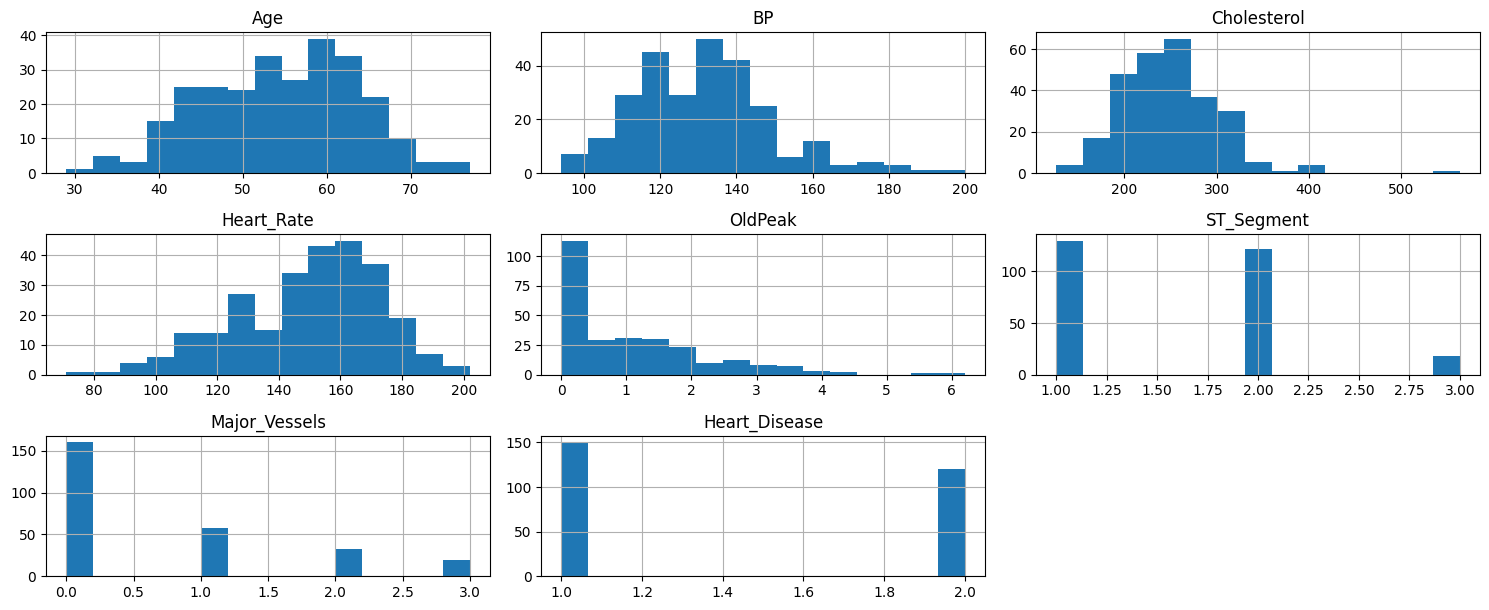

In [77]:
#VISUALIZATION

numerical_features = df_1.select_dtypes(include=['int64', 'float64']).columns
df_1[numerical_features].hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

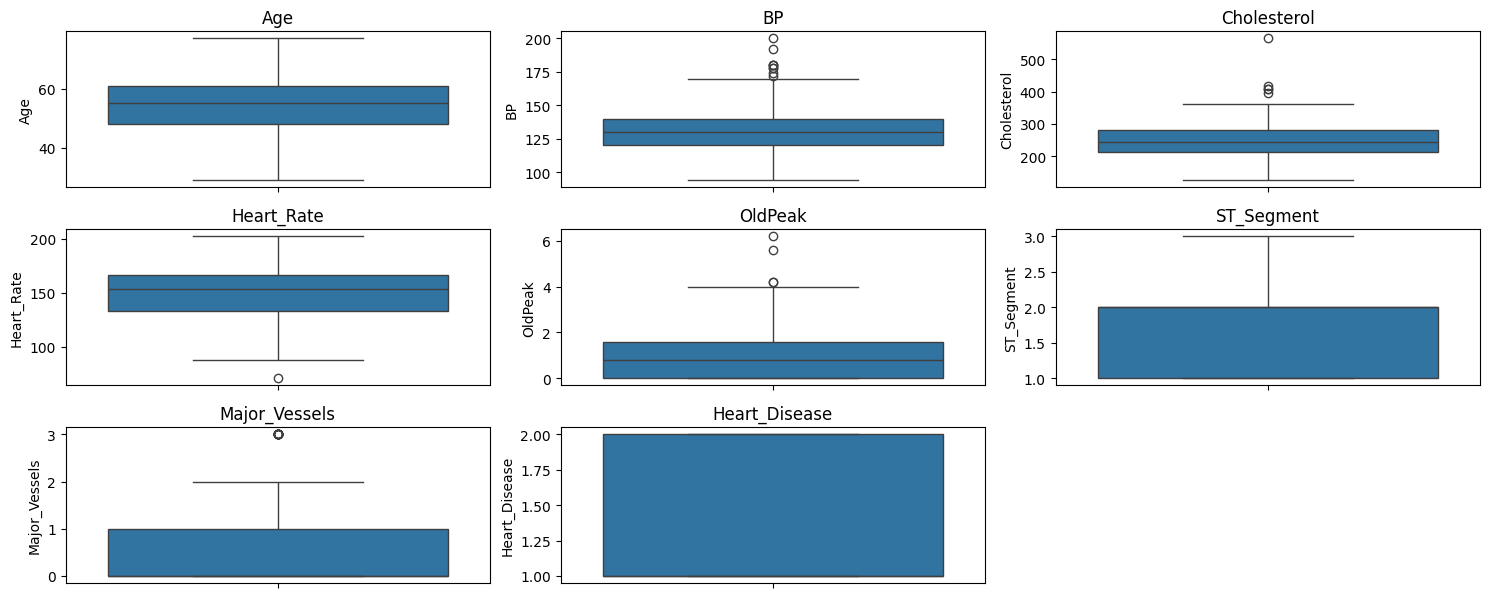

In [78]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
numerical_features = df_1.select_dtypes(include=['int64', 'float64']).columns
for i, column in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df_1[column])
    plt.title(column)
plt.tight_layout()
plt.show()



Oultiers in BP:  [172 174 178 180 192 200]

Records with Outliers in BP: 

      Age Sex CP_Type   BP  Cholesterol FBS ECG  Heart_Rate Exe_Induced_Angina  \
58    59   0       4  174          249   0   0         143                  1   
87    59   1       1  178          270   0   2         145                  0   
110   55   0       4  180          327   0   1         117                  1   
117   56   0       4  200          288   1   2         133                  1   
144   54   1       2  192          283   0   2         195                  0   
159   66   0       4  178          228   1   0         165                  1   
165   64   0       4  180          325   0   0         154                  1   
240   68   1       3  180          274   1   2         150                  1   
265   52   1       3  172          199   1   0         162                  0   

     OldPeak  ST_Segment  Major_Vessels Thal  Heart_Disease  
58       0.0           2              0    3      

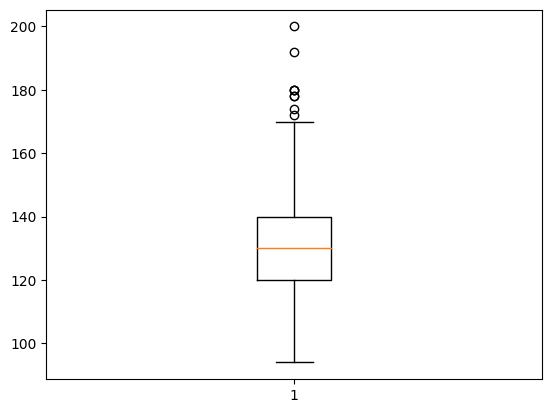

In [84]:
box = plt.boxplot(df_1['BP'])
#plt.show()

#There are outliers but they are observations on medical emergency cases, it seems
outliers = [item.get_ydata() for item in box['fliers']] #fliers are outliers

#print(sorted(outliers[0]))
unique_values = np.unique(outliers[0])
print('\nOultiers in BP: ',unique_values)
print('\nRecords with Outliers in BP: \n\n',df_1[df_encoded['BP'].isin(unique_values)])

#From analysing above records, its clear that those are not outliers but valid observations



Oultiers in Cholesterol:  [394 407 409 417 564]

Records with Outliers in Cholesterol: 

      Age Sex CP_Type   BP  Cholesterol FBS ECG  Heart_Rate Exe_Induced_Angina  \
1     67   0       3  115          564   0   2         160                  0   
9     63   0       4  150          407   0   2         154                  0   
52    65   0       3  140          417   1   2         157                  0   
181   56   0       4  134          409   0   2         150                  1   
188   62   0       4  140          394   0   2         157                  0   

     OldPeak  ST_Segment  Major_Vessels Thal  Heart_Disease  
1        1.6           2              0    7              1  
9        4.0           2              3    7              2  
52       0.8           1              1    3              1  
181      1.9           2              2    7              2  
188      1.2           2              0    3              1  


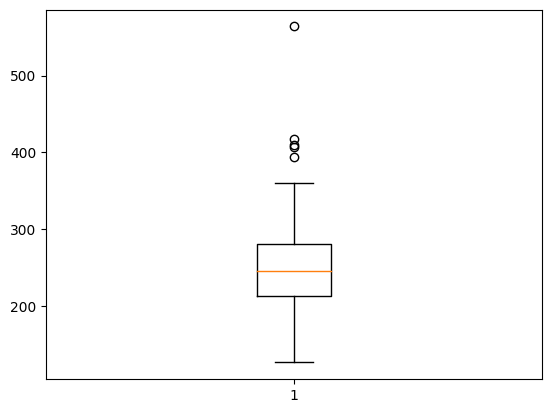

In [85]:
box = plt.boxplot(df_1['Cholesterol'])
#plt.show()

#There are outliers but they are observations on medical emergency cases, it seems
outliers = [item.get_ydata() for item in box['fliers']] #fliers are outliers

#print(sorted(outliers[0]))
unique_values = np.unique(outliers[0])
print('\nOultiers in Cholesterol: ',unique_values)
print('\nRecords with Outliers in Cholesterol: \n\n',df_1[df_1['Cholesterol'].isin(unique_values)])

#From analysing above records, its clear that those are not outliers but valid observations



Oultiers in Heart_Rate:  [71]

Records with Outliers in Heart_Rate: 

      Age Sex CP_Type   BP  Cholesterol FBS ECG  Heart_Rate Exe_Induced_Angina  \
101   67   1       4  120          237   0   0          71                  0   

     OldPeak  ST_Segment  Major_Vessels Thal  Heart_Disease  
101      1.0           2              0    3              2  


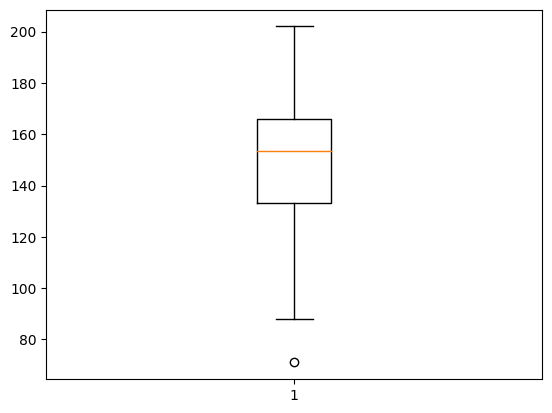

In [86]:
box = plt.boxplot(df_1['Heart_Rate'])
#plt.show()

#There are outliers but they are observations on medical emergency cases, it seems
outliers = [item.get_ydata() for item in box['fliers']] #fliers are outliers

#print(sorted(outliers[0]))
unique_values = np.unique(outliers[0])
print('\nOultiers in Heart_Rate: ',unique_values)
print('\nRecords with Outliers in Heart_Rate: \n\n',df_1[df_1['Heart_Rate'].isin(unique_values)])

#From analysing above records, its clear that those are not outliers but valid observations



Oultiers in OldPeak:  [4.2 5.6 6.2]

Records with Outliers in OldPeak: 

      Age Sex CP_Type   BP  Cholesterol FBS ECG  Heart_Rate Exe_Induced_Angina  \
87    59   1       1  178          270   0   2         145                  0   
156   55   1       4  140          217   0   0         111                  1   
176   51   1       4  140          298   0   0         122                  1   
235   62   0       4  160          164   0   2         145                  0   

     OldPeak  ST_Segment  Major_Vessels Thal  Heart_Disease  
87       4.2           3              0    7              1  
156      5.6           3              0    7              2  
176      4.2           2              3    7              2  
235      6.2           3              3    7              2  


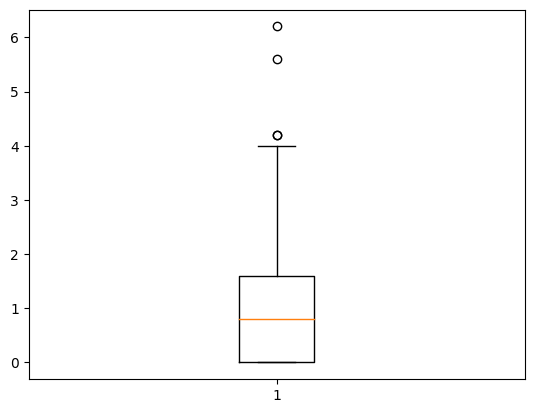

In [87]:
box = plt.boxplot(df_1['OldPeak'])
#plt.show()

#There are outliers but they are observations on medical emergency cases, it seems
outliers = [item.get_ydata() for item in box['fliers']] #fliers are outliers

#print(sorted(outliers[0]))
unique_values = np.unique(outliers[0])
print('\nOultiers in OldPeak: ',unique_values)
print('\nRecords with Outliers in OldPeak: \n\n',df_1[df_1['OldPeak'].isin(unique_values)])

#From analysing above records, its clear that those are not outliers but valid observations



Oultiers in Major_Vessels:  [3]

Records with Outliers in Major_Vessels: 

      Age Sex CP_Type   BP  Cholesterol FBS ECG  Heart_Rate Exe_Induced_Angina  \
0     70   1       4  130          322   0   2         109                  0   
9     63   0       4  150          407   0   2         154                  0   
46    49   1       3  118          149   0   2         126                  0   
48    66   1       2  160          246   0   0         120                  1   
49    65   0       4  150          225   0   2         114                  0   
75    45   1       4  142          309   0   2         147                  1   
103   57   1       4  165          289   1   2         124                  0   
120   49   1       3  120          188   0   0         139                  0   
171   69   1       3  140          254   0   2         146                  0   
175   62   0       4  138          294   1   0         106                  0   
176   51   1       4  140       

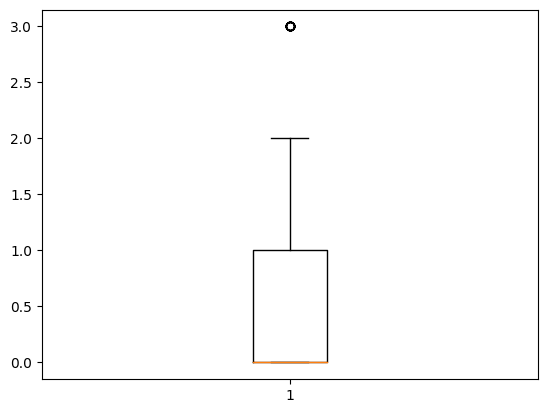

In [88]:
box = plt.boxplot(df_1['Major_Vessels'])
#plt.show()

#There are outliers but they are observations on medical emergency cases, it seems
outliers = [item.get_ydata() for item in box['fliers']] #fliers are outliers

#print(sorted(outliers[0]))
unique_values = np.unique(outliers[0])
print('\nOultiers in Major_Vessels: ',unique_values)
print('\nRecords with Outliers in Major_Vessels: \n\n',df_1[df_1['Major_Vessels'].isin(unique_values)])

#From analysing above records, its clear that those are not outliers but valid observations


<Figure size 2000x2000 with 0 Axes>

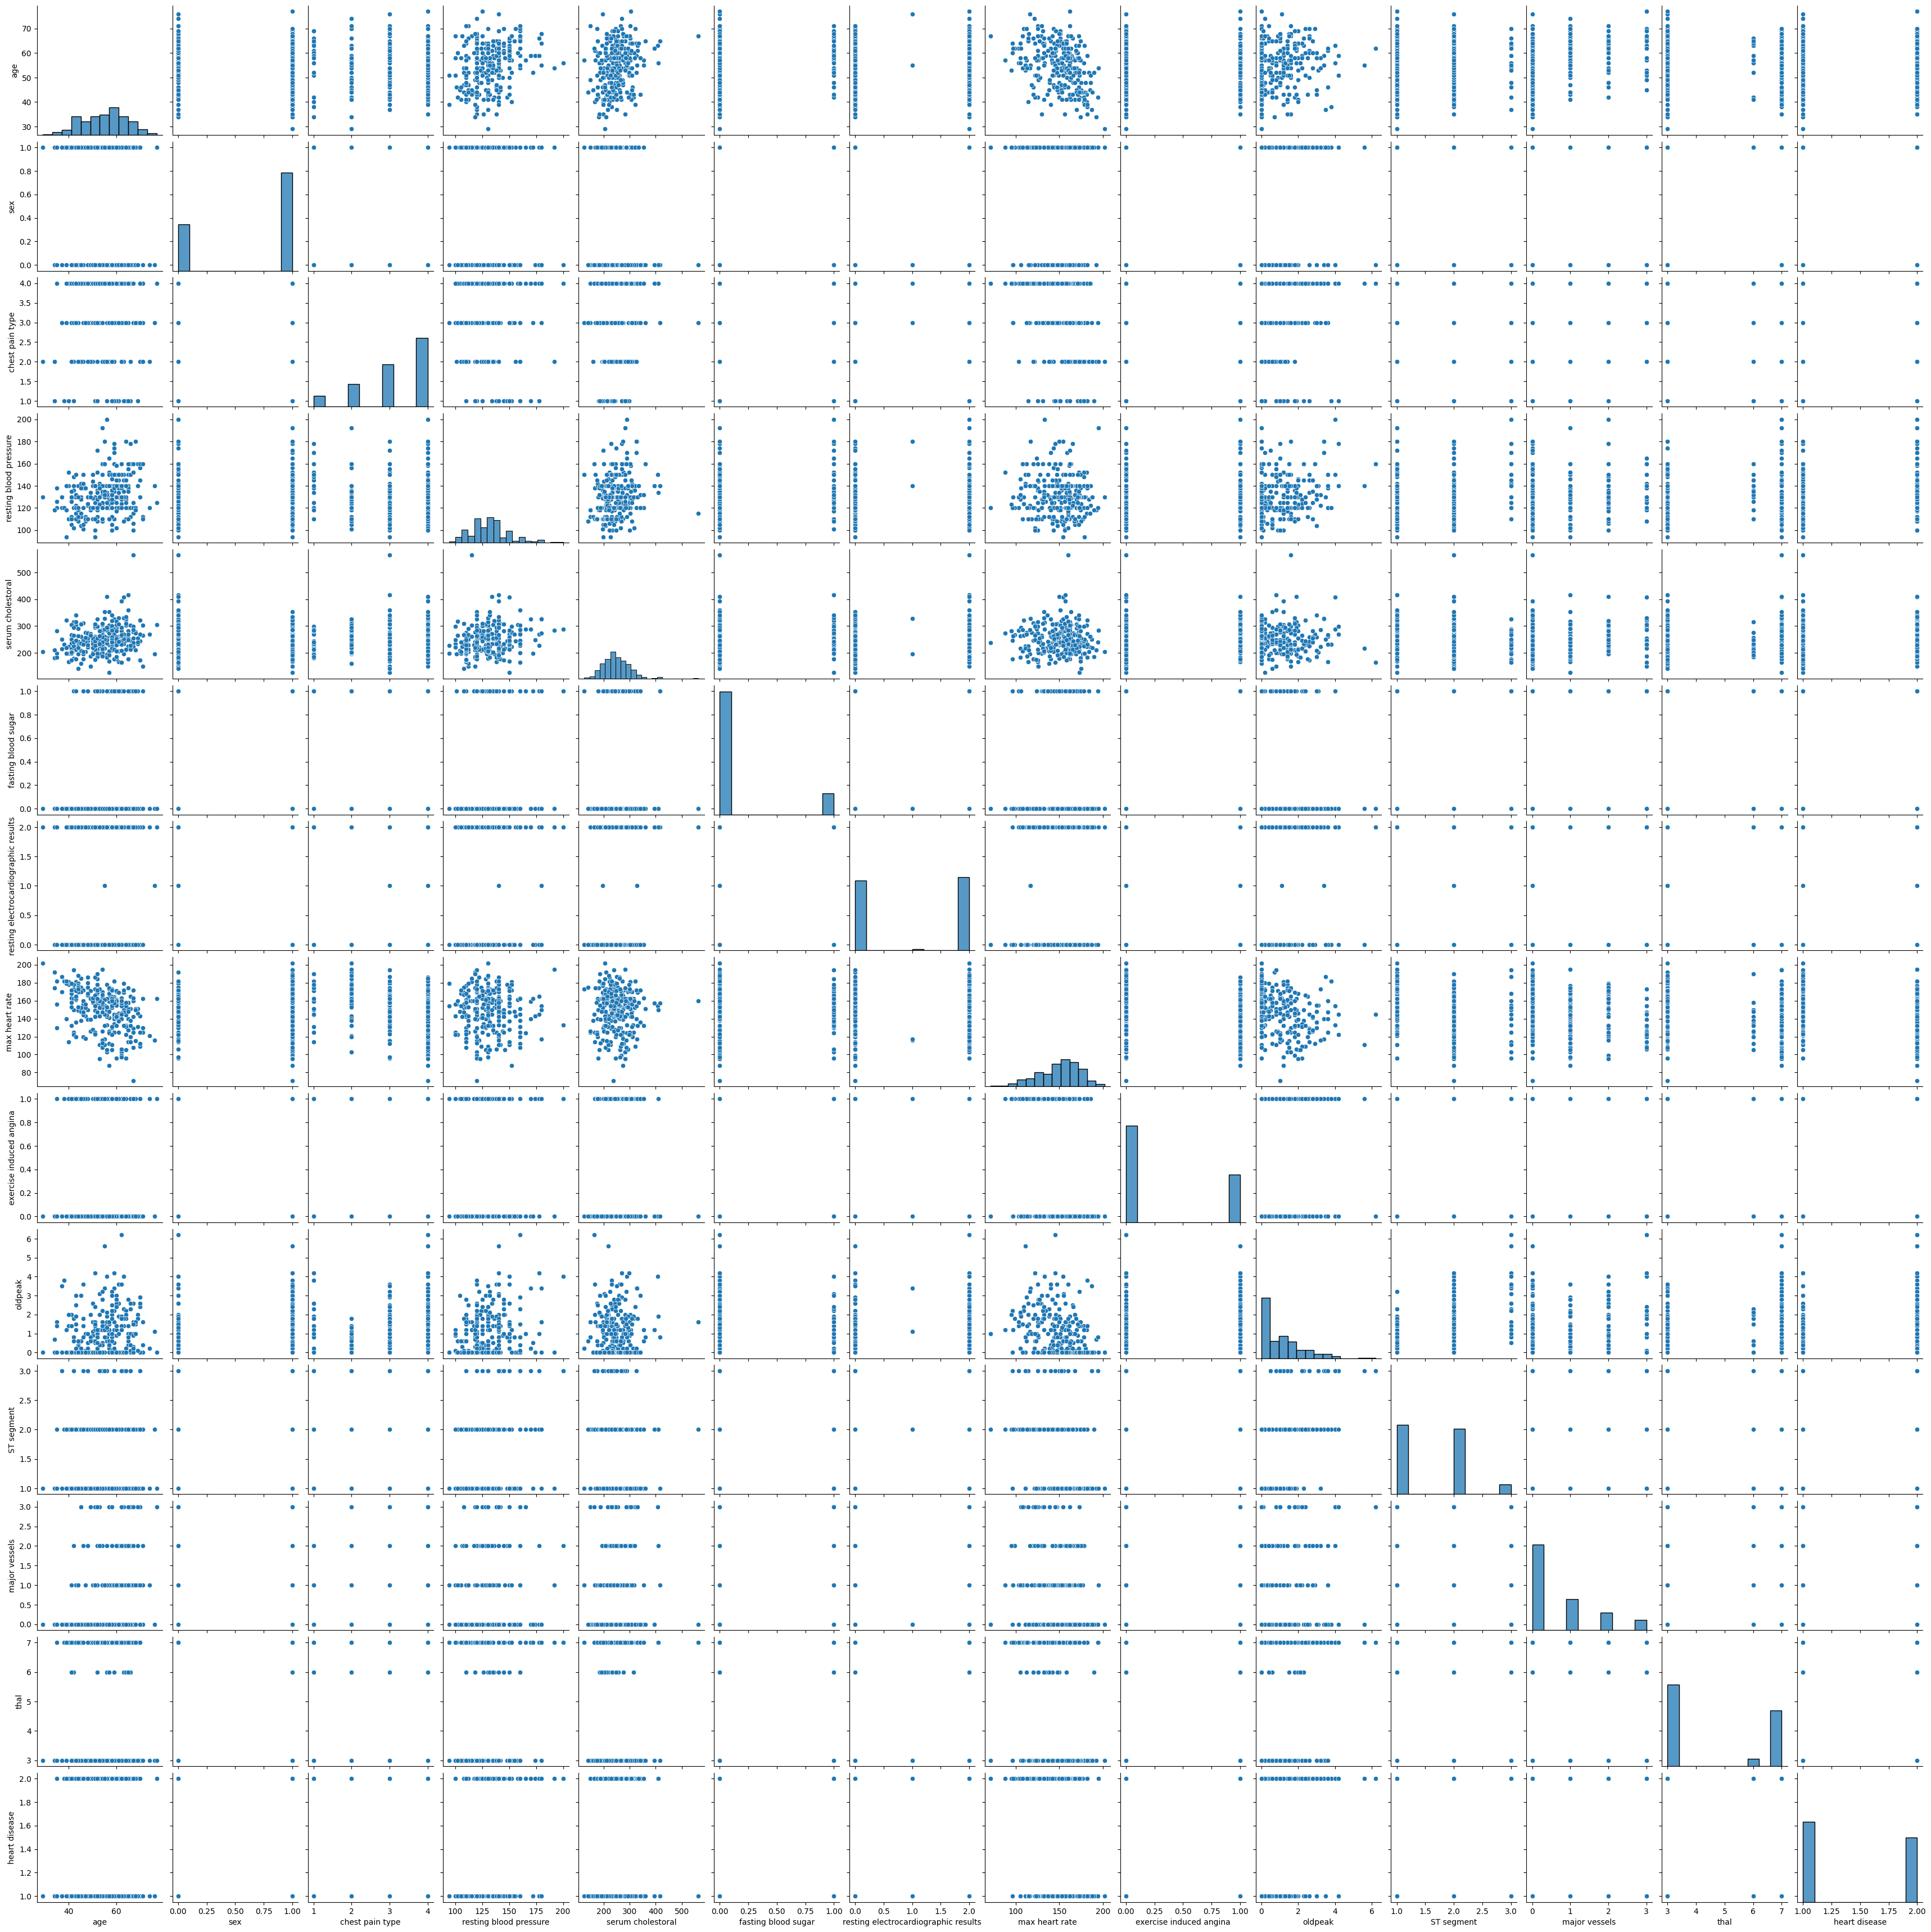

In [100]:
# Pair plot
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()


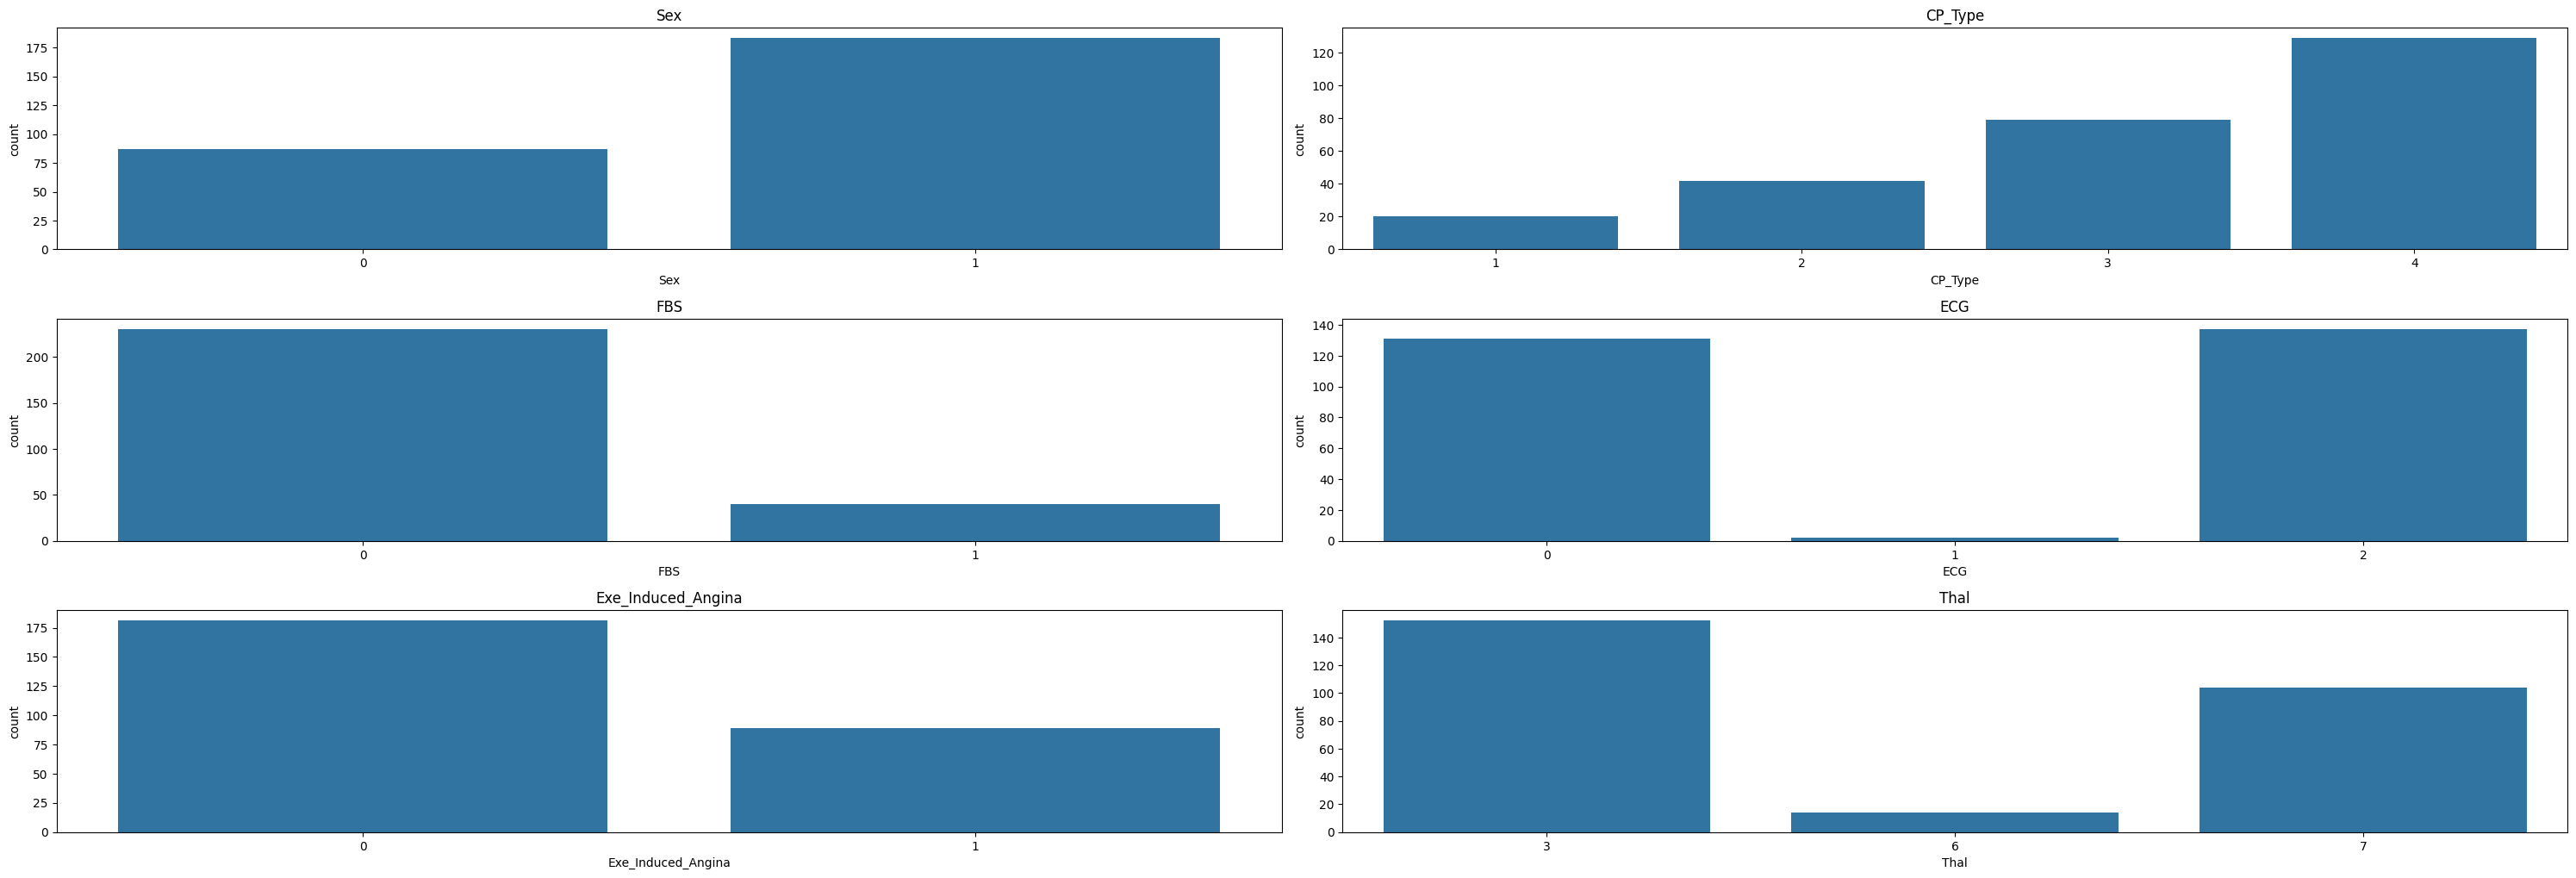

In [123]:
# Count plots for categorical features
categorical_features = df_1.select_dtypes(include='category').columns
#numerical_features = df_1.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(30, 20))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(6, 2, i)
    sns.countplot(data=df_1, x=column)
    plt.title(column)
plt.tight_layout()
plt.show()

#--------------------INFERENCES----------------#
#The count plot makes visible the descriptive statistics



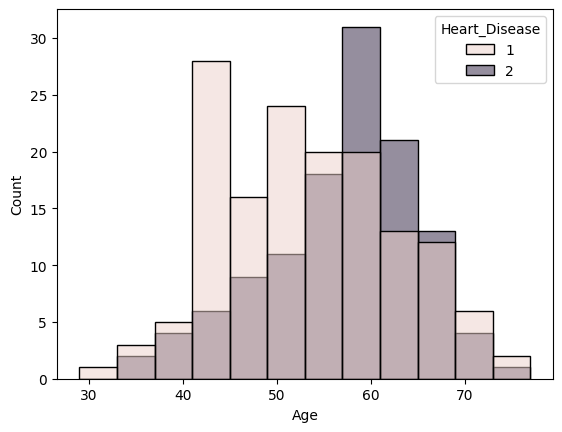

In [134]:
sns.histplot(data=df_1,x='Age',hue='Heart_Disease')
plt.show()

#Though Heart Disease tend to be more with patiens of age between 55 and 65
#Patients younger are also seen identified with Heart Disease


From the correlation matrix and the heat map, the **correlation of Age with Presence of heart Disease is WEAK**

From the Histogram of Age with Heart Disease as Hue, we can see that though there are older patients with heart disease, similarly young patients are also found with heart disease. So there are other Contributing Parameters other than Age alone for the presence of Heart Disease

In [133]:
pd.crosstab(df_1['Sex'], df_1['Heart_Disease'])
#Men are identified more with Heart Disease than Women

Heart_Disease,1,2
Sex,,
0,67,20
1,83,100


In [143]:
# Cross-tabulation for 'chest pain type' and 'heart disease'
pd.crosstab(df_1['CP_Type'], df_1['Heart_Disease'])
#Type 4 chest pain is the associated with presence of Heart Disease more than other Chest Pain Types

Heart_Disease,1,2
CP_Type,,
1,15,5
2,35,7
3,62,17
4,38,91


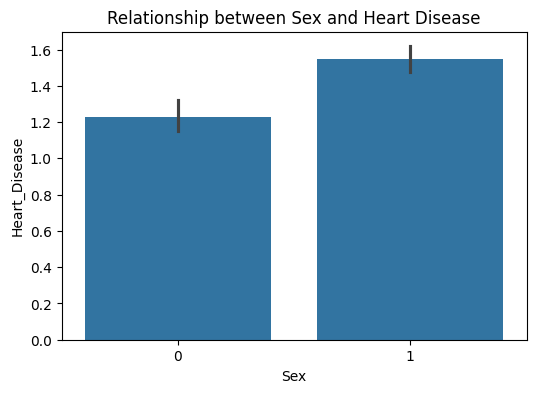

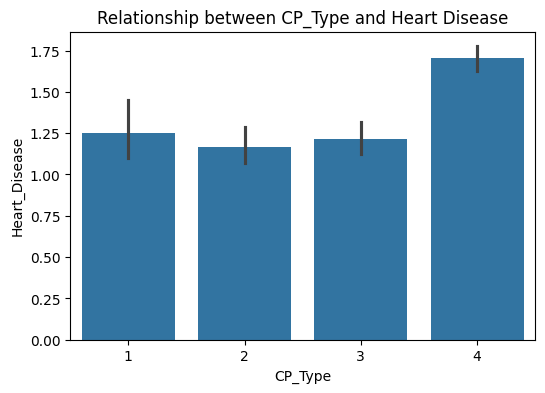

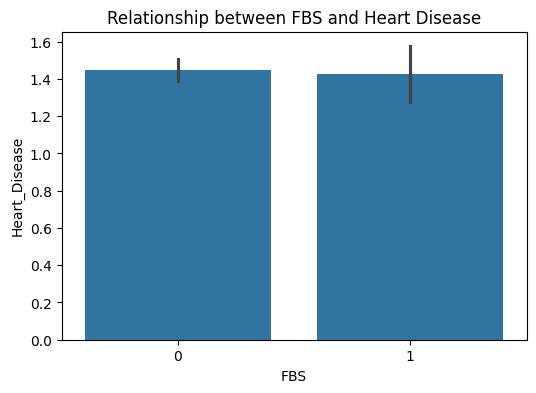

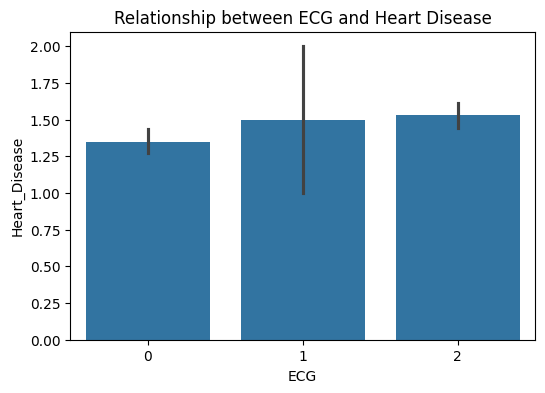

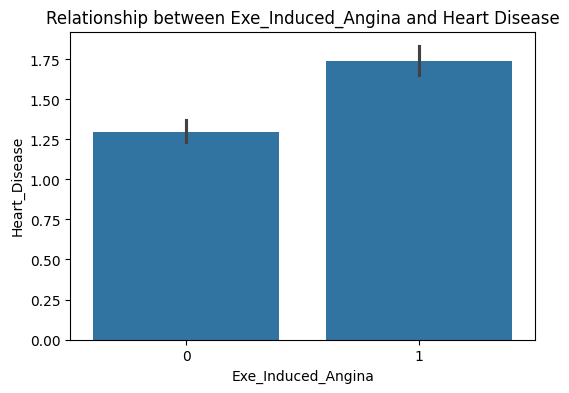

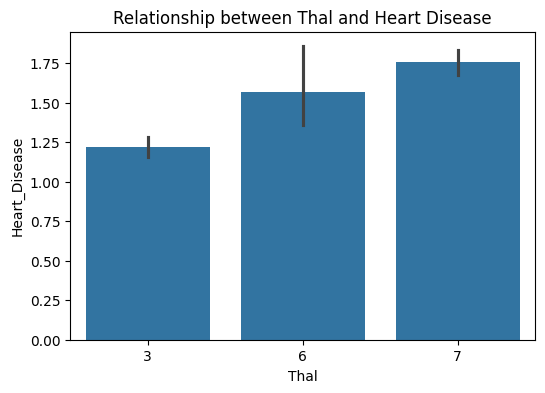

In [115]:
#Relationship of Target Column with the Categorical Columns
for column in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=column, y='Heart_Disease', data=df_1)
    plt.title(f'Relationship between {column} and Heart Disease')
    plt.show()

#--------------------INFERENCES----------------#
#Sex and Target: Male patients are diagnosed with heart disease more in this dataset
#Chest Pain Type and Target: Heart Disease is present with Type 4 Pain and then with types 1,2,3
#FBS and Target: There is no difference in getting Heart Disease even if FBS is within or out of nnormal range
#ECG and Target: Heart Disease presence is more likely with the ECG result readings
#Exercise Induced Angina and Target: More chance of heart disease with exercise induced angina
#Thal and Target: Heart Disease is contributed more by Thal values 7 and 6 than 3

**Sex and Target**: Male patients are diagnosed with heart disease more in this dataset

**Chest Pain Type and Target**: Heart Disease is present with Type 4 Pain and then with types 1,2,3

**FBS and Target**: There is no difference in getting Heart Disease even if FBS is within or out of normal range

**ECG and Target**: Heart Disease presence is more likely with the ECG result readings

**Exercise Induced Angina and Target**: More chance of heart disease with exercise induced angina

**Thal and Target**: Heart Disease is contributed more by Thal values 7 and 6 than 3

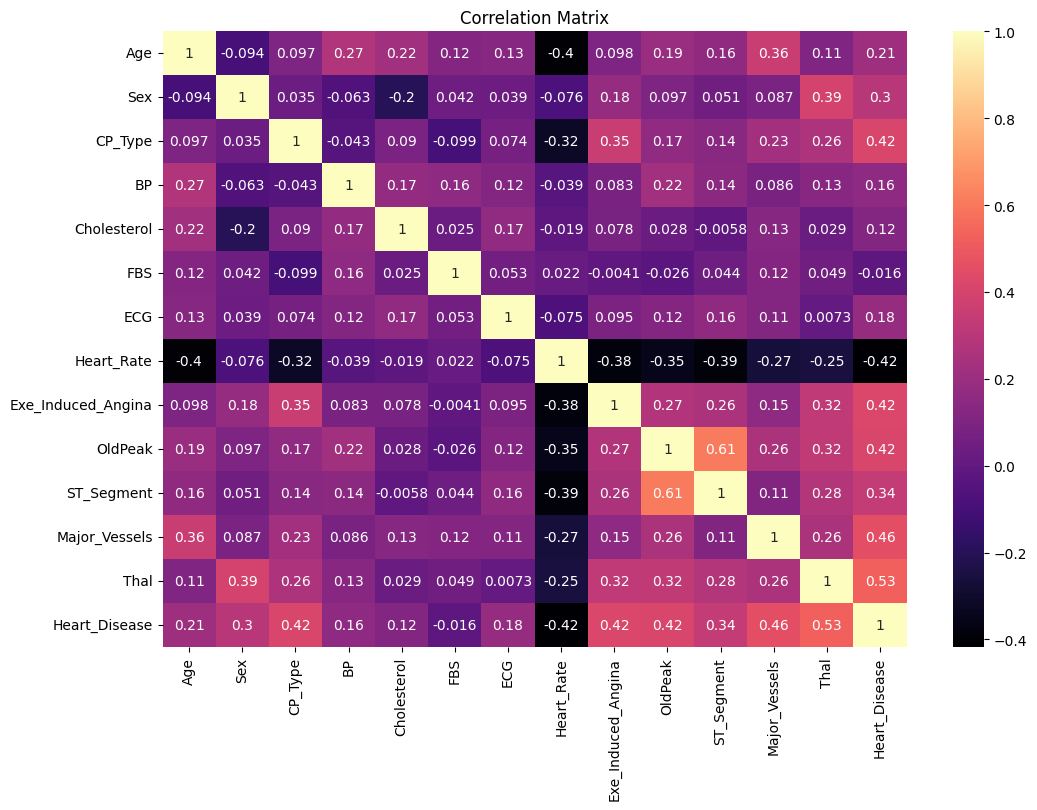

In [81]:
#Correlation with categorical columns converted to category dtype
# Correlation matrix
correlation_matrix = df_1.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

#--------------------INFERENCES----------------#
#From the Heat Map of the Correlation Matrix, we can come at below inference
#Target Column is having Positive coorelations with Thal(0.53), Major Vessels(0.46)
#Old Peak(0.42) and Exercise Induced Angina (0.42)
#Heart Rare(Negative correlation of 0.42)
#ST Segment (0.34)

**From the Heat Map of the Correlation Matrix, we can come at below inference**

**Target Column is having Positive coorelations with Thal(0.53), Major Vessels(0.46), Old Peak(0.42), Exercise Induced Angina (0.42), Heart Rare(Negative correlation of 0.42) and ST Segment (0.34)**

From the correlation matrix and the heat map, the **correlation of Cholestrol with Presence of heart Disease is WEAK**
